In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
#flight_data = pd.read_csv("flights_sample_3m.csv")
#weather_data =pd.read_csv("WeatherEvents_Jan2016-Dec2022.csv")

# Load the datasets
flight_data = pd.read_csv("flights_sample_3m.csv")
weather_data = pd.read_csv("WeatherEvents_Jan2016-Dec2022.csv")

# Display basic information for flight data
print("Flight Data Information:")
print(f'Shape: {flight_data.shape}\n')  
print(f'Dtypes:\n{flight_data.dtypes}\n')  
print(f'First 5 Rows:\n{flight_data.head()}\n') 

# Display basic information for weather data
print("Weather Data Information:")
print(f'Shape: {weather_data.shape}\n')  
print(f'Dtypes:\n{weather_data.dtypes}\n')  
print(f'First 5 Rows:\n{weather_data.head()}')  

Flight Data Information:
Shape: (3000000, 32)

Dtypes:
FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64


In [15]:
# Check for missing values in flight_data
print("\nMissing Values in Flight Data:")
print(flight_data.isnull().sum())

# Check for missing values in weather_data
print("\nMissing Values in Weather Data:")
print(weather_data.isnull().sum())


#start by dropping any duplicates 
flight_data_postDrop = flight_data.drop_duplicates()

weather_data_postDrop = weather_data.drop_duplicates()

# Convert date columns to datetime format
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'])
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)']) 
weather_data['EndTime(UTC)'] = pd.to_datetime(weather_data['EndTime(UTC)'])  

# # Check the conversions
# print(flight_data['FL_DATE'].head())
# print(weather_data[['StartTime(UTC)', 'EndTime(UTC)']].head())


Missing Values in Flight Data:
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER      

In [ ]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data')
plt.show()


Shape after dropping 2023 flights: (2536516, 32)


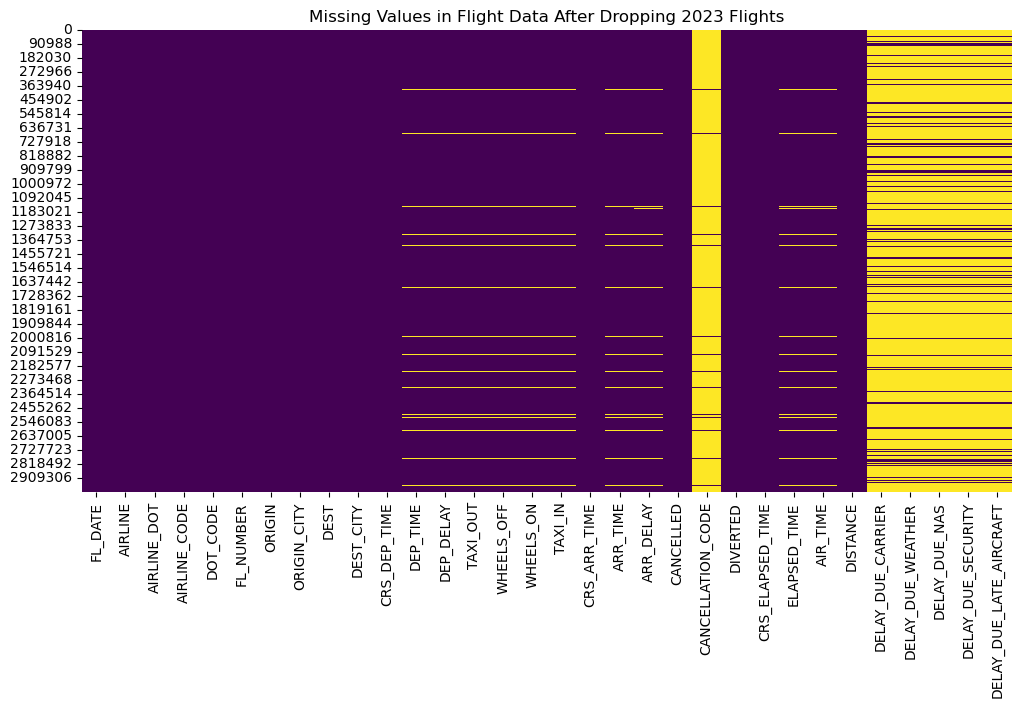

Shape of weather data after dropping before 2019: (4844178, 14)


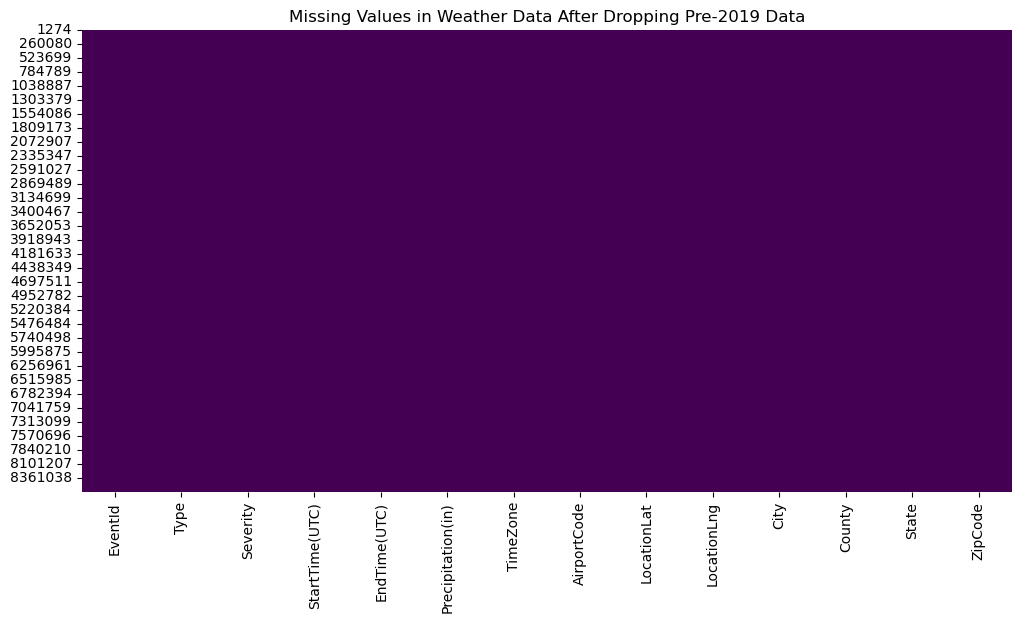

In [16]:
#the weather data set that I found is from 19-23 and weather events is from 16-22, lets remvoe extra data that doesnt overlap in these data sets 

#drop the extra data from 23 on the flight details
flight_data_postDrop['FL_DATE'] = pd.to_datetime(flight_data_postDrop['FL_DATE'])

# Drop rows where FL_DATE is in the year 2023
flight_data_postDrop = flight_data_postDrop[flight_data_postDrop['FL_DATE'].dt.year != 2023]

# Check the shape of the DataFrame after the drop
print(f'Shape after dropping 2023 flights: {flight_data_postDrop.shape}')

# Visualize missing data after dropping 2023 flights
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data After Dropping 2023 Flights')
plt.show()

#shouldnt expect much change in missing values but here we are 

#drop weather data brefore 2019
# Ensure StartTime(UTC) is in datetime format
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)'])

# Drop rows where the year is before 2019
weather_data_filtered = weather_data[weather_data['StartTime(UTC)'].dt.year >= 2019]
weather_data_filtered = weather_data_filtered.dropna()


# Check the shape of the DataFrame after the drop
print(f'Shape of weather data after dropping before 2019: {weather_data_filtered.shape}')

# Visualize missing data in weather_data_filtered
plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_filtered.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data After Dropping Pre-2019 Data')
plt.show()


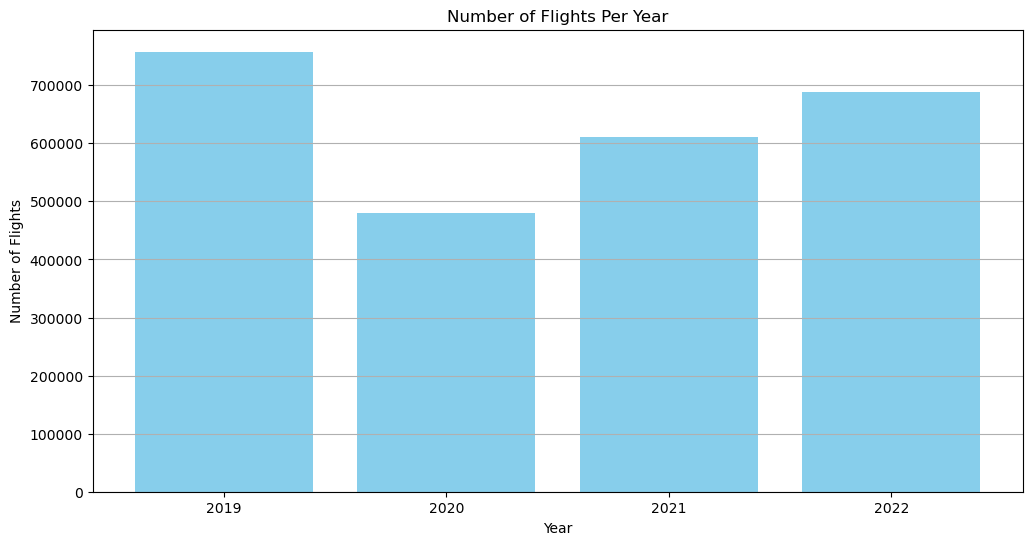

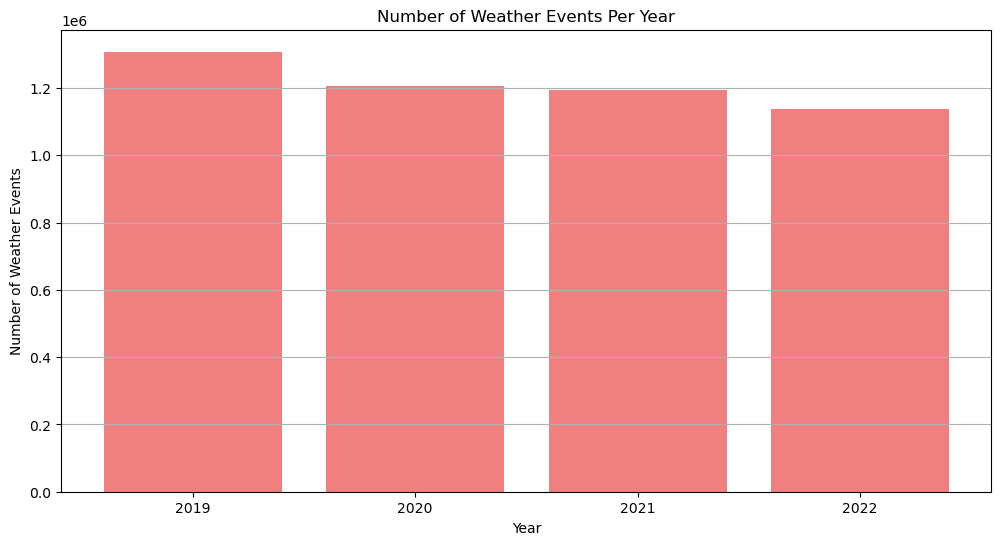

In [18]:
#validate that the drops worked correctly for the overlappign years


flight_data_postDrop['FL_DATE'] = pd.to_datetime(flight_data_postDrop['FL_DATE'])

flight_data_postDrop['Year'] = flight_data_postDrop['FL_DATE'].dt.year

# Count the number of flights per year
flights_per_year = flight_data_postDrop['Year'].value_counts().sort_index()

# Plot the number of flights per year
plt.figure(figsize=(12, 6))
plt.bar(flights_per_year.index, flights_per_year.values, color='skyblue')
plt.title('Number of Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(flights_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(axis='y')
plt.show()


#validate weather 

weather_data_filtered['StartTime(UTC)'] = pd.to_datetime(weather_data_filtered['StartTime(UTC)'])

weather_data_filtered['Year'] = weather_data_filtered['StartTime(UTC)'].dt.year

weather_events_per_year = weather_data_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(weather_events_per_year.index, weather_events_per_year.values, color='lightcoral')
plt.title('Number of Weather Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Weather Events')
plt.xticks(weather_events_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(axis='y')
plt.show()


In [21]:
#handle catagorical data
# Renaming the numeric values to categorical in columns Cancelled and Diverted 
flight_data_postDrop['CANCELLED'] = flight_data_postDrop['CANCELLED'].replace([1, 0], ["CANCELLED", "NOT CANCELLED"])
flight_data_postDrop['DIVERTED'] = flight_data_postDrop['DIVERTED'].replace([1, 0], ["DIVERTED", "NOT DIVERTED"])

In [23]:
#lesson learned from V2, need ot split the cnaceld and non cnacled flights beecuase they correspond with eachother for the missign in other columns 
#new dataFrame to hold the valeus for imputation
non_canceled_flights = flight_data_postDrop[flight_data_postDrop['CANCELLED'] != 'CANCELLED']
canceled_flights = flight_data_postDrop[flight_data_postDrop['CANCELLED'] == 'CANCELLED']

missing_values_count = non_canceled_flights.isnull().sum()
print("\nMissing values in non-canceled flights:")
print(missing_values_count)


Missing values in non-canceled flights:
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                      685
TAXI_IN                        685
CRS_ARR_TIME                     0
ARR_TIME                       683
ARR_DELAY                     5796
CANCELLED                        0
CANCELLATION_CODE          2465185
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                  5796
AIR_TIME                      5796
DISTANCE                         0
DELAY_DUE_CARR

**Now that we knoe where the missing vlaues really are, we can do KNN like we did in V2**

In [25]:
#used CHATGPT 4.0 on oct 12th listed in V2, and agian on oct 14ht at 8pm after ealizing error, to help update the sytanx to match my new varibale names 
from sklearn.impute import KNNImputer


def knn_impute_column(df, col_to_impute, n_neighbors=5):
    print(f"Imputing {col_to_impute}...")
    
    # Sort by 'DISTANCE' to ensure consistency
    df_sorted = df.sort_values(by='DISTANCE')
    
    
    knn_data = df_sorted[['DISTANCE', col_to_impute]].copy()
    
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    
    knn_data_imputed = imputer.fit_transform(knn_data)
    
    df_sorted[col_to_impute] = knn_data_imputed[:, 1]
    
    df.loc[df_sorted.index, col_to_impute] = df_sorted[col_to_impute]

# Filter the data for 2022
flights_2022 = non_canceled_flights[non_canceled_flights['Year'] == 2022]


In [27]:
# Columns to impute
columns_to_impute = ['ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY']

# Perform KNN imputation for each column using the function
for column in columns_to_impute:
    knn_impute_column(flights_2022, column)

# Check missing values after imputation
print("Missing values after KNN imputation for 2022 data:")
print(flights_2022[columns_to_impute].isnull().sum())


Imputing ELAPSED_TIME...
Imputing AIR_TIME...
Imputing WHEELS_ON...
Imputing TAXI_IN...
Imputing ARR_TIME...
Imputing ARR_DELAY...
Missing values after KNN imputation for 2022 data:
ELAPSED_TIME    0
AIR_TIME        0
WHEELS_ON       0
TAXI_IN         0
ARR_TIME        0
ARR_DELAY       0
dtype: int64


In [29]:
# now we haev imputed ofr 2022, pull out cancled lfights in 2022 
canceled_flights_2022 = flight_data_postDrop[
    (flight_data_postDrop['CANCELLED'] == 'CANCELLED') & 
    (flight_data_postDrop['FL_DATE'].dt.year == 2022)
]
missing_values_count_canceled_2022 = canceled_flights_2022.isnull().sum()
print("\nMissing values in canceled flights (2022):")
print(missing_values_count_canceled_2022)



Missing values in canceled flights (2022):
FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                   18016
DEP_DELAY                  18021
TAXI_OUT                   18354
WHEELS_OFF                 18354
WHEELS_ON                  18448
TAXI_IN                    18448
CRS_ARR_TIME                   0
ARR_TIME                   18448
ARR_DELAY                  18448
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               0
ELAPSED_TIME               18448
AIR_TIME                   18448
DISTANCE                       0
DELAY_DUE_CARRIER          18448
DELAY_DUE_WEATHER          18448

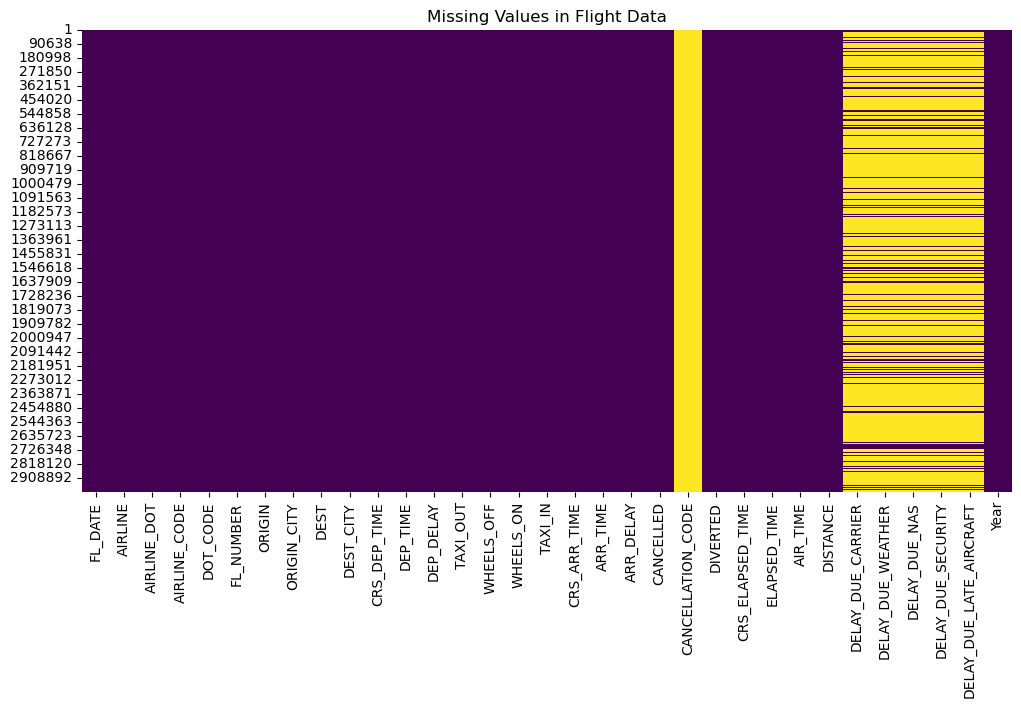

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(flights_2022.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data')
plt.show()


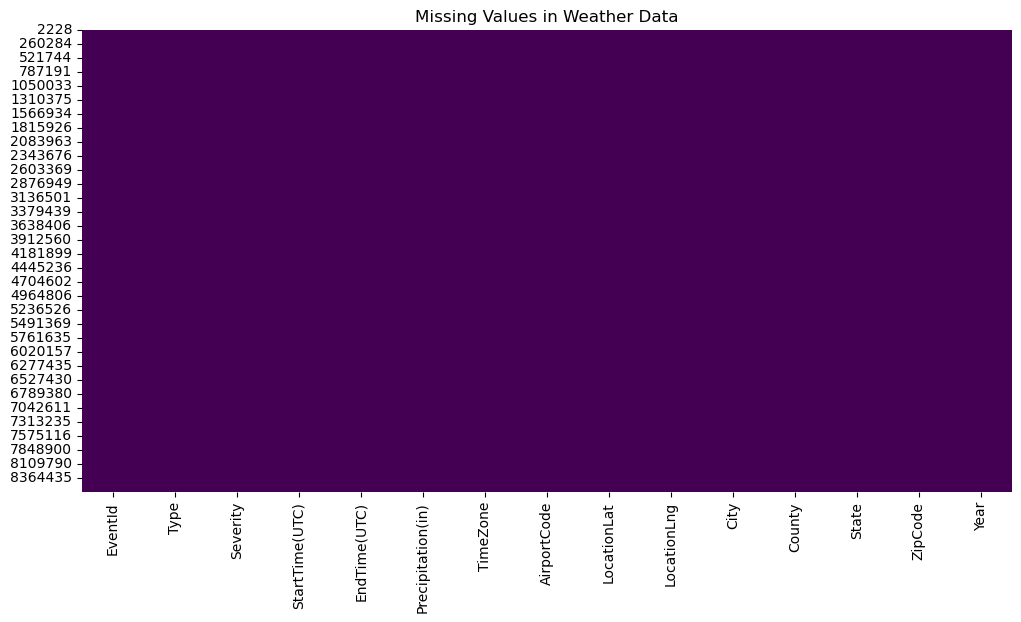

In [33]:
weather_data_2022 = weather_data_filtered[weather_data_filtered['StartTime(UTC)'].dt.year == 2022]
plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_2022.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data')
plt.show()


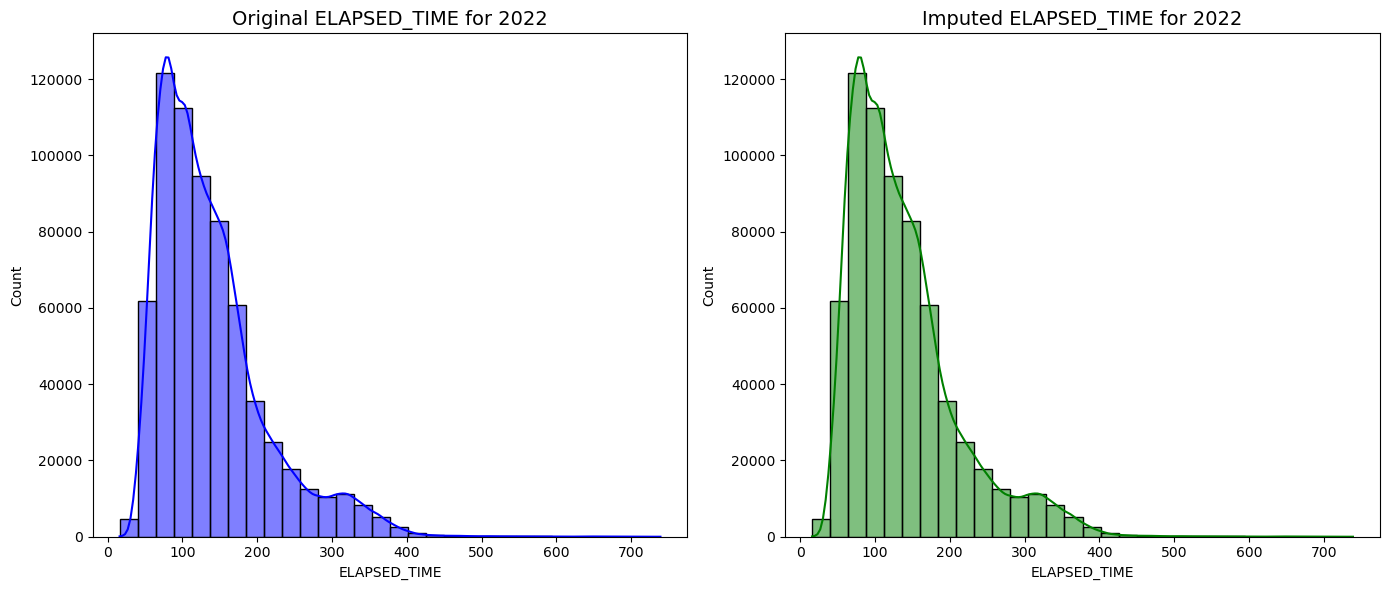

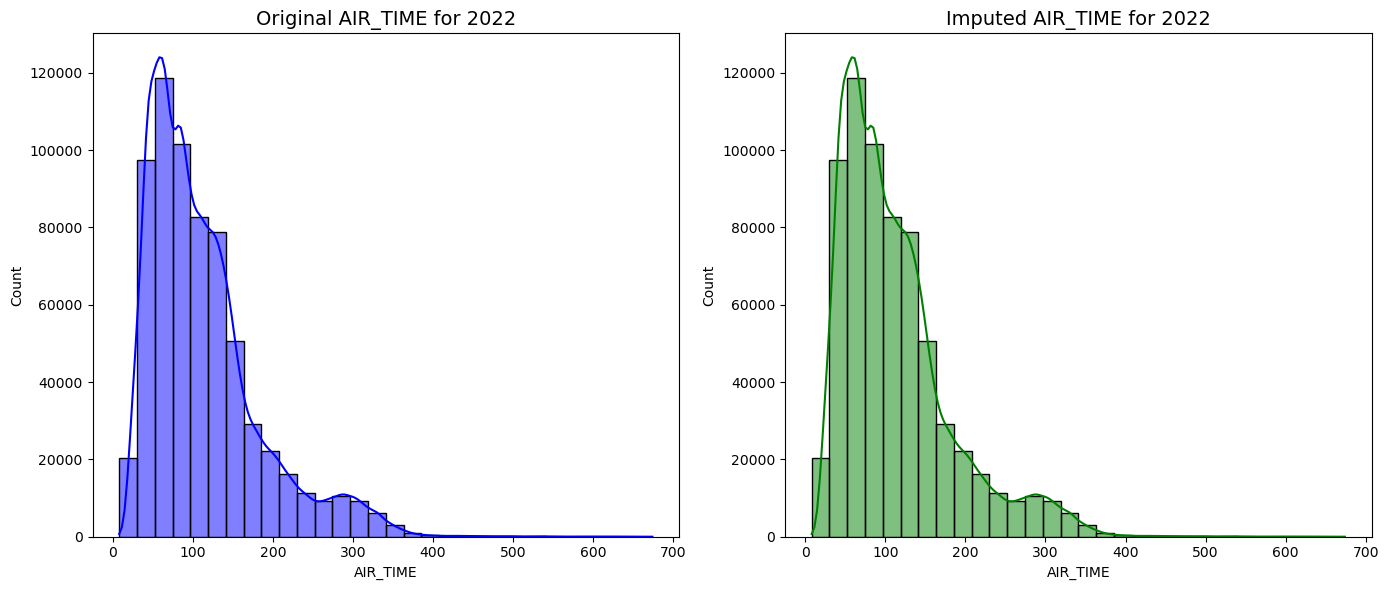

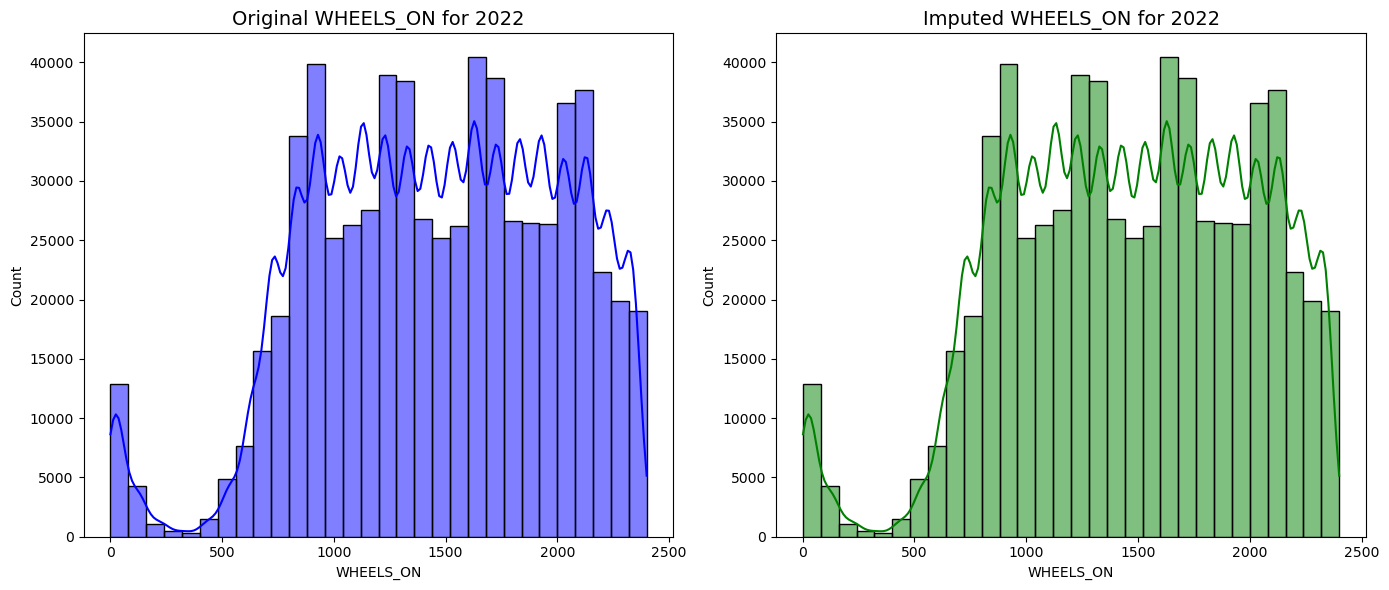

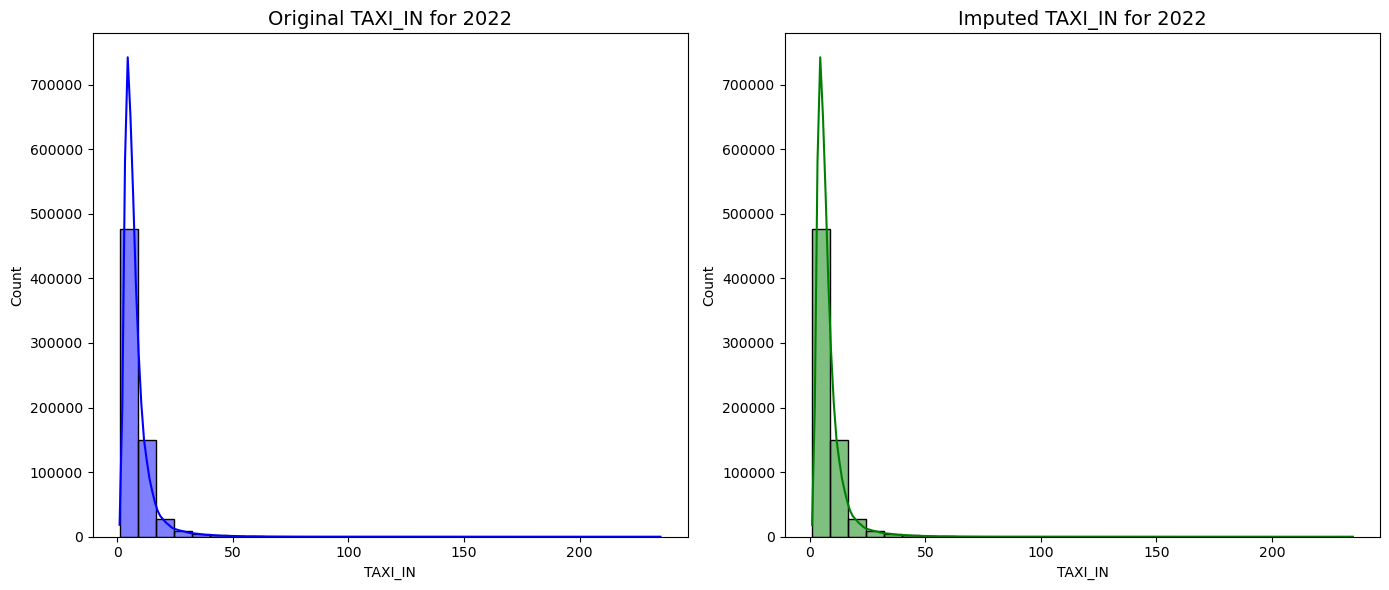

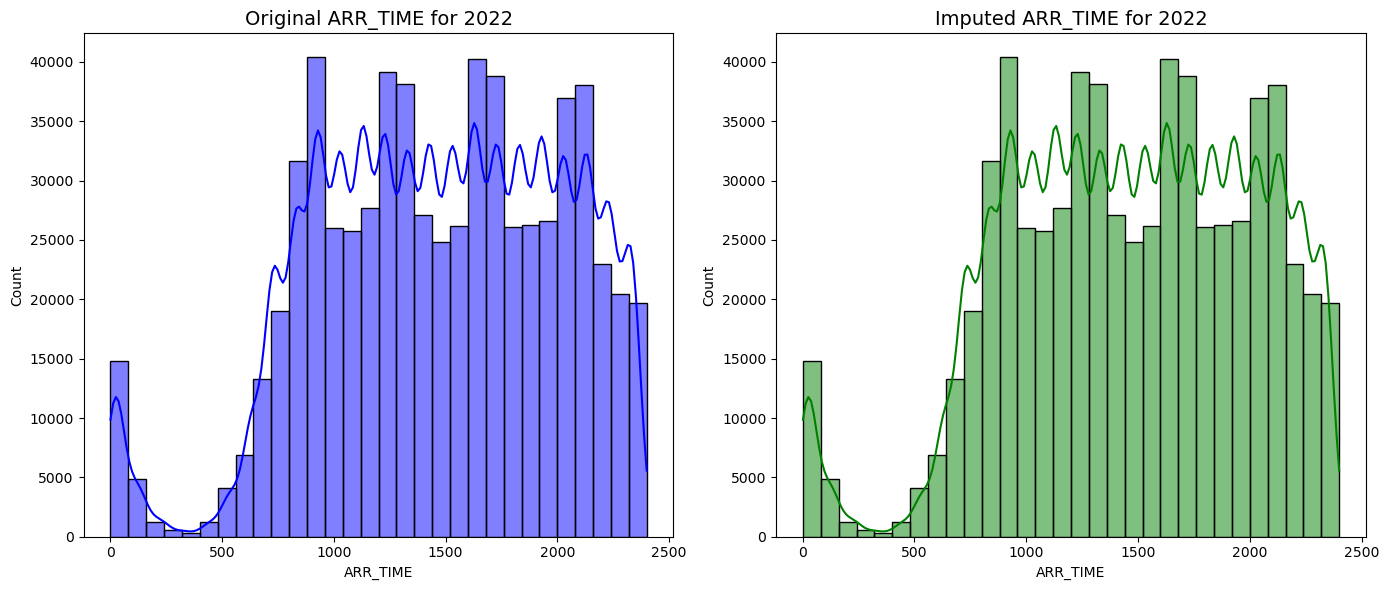

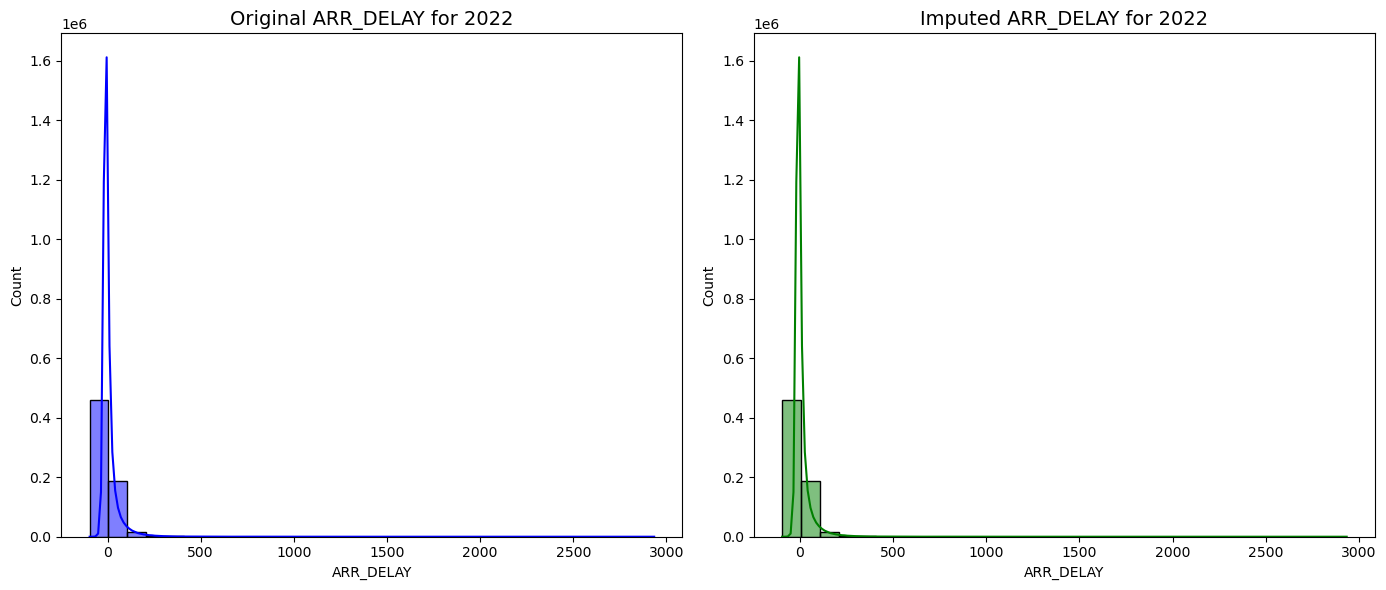

In [35]:
# Function to plot original and imputed data side by side for comparison
def plot_imputation_comparison(df, column, imputed_column, title_suffix=""):
    plt.figure(figsize=(14, 6))

    # Plot original data (before imputation)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True, color="blue", bins=30)
    plt.title(f"Original {column} {title_suffix}", fontsize=14)
    
    # Plot imputed data (after imputation)
    plt.subplot(1, 2, 2)
    sns.histplot(df[imputed_column], kde=True, color="green", bins=30)
    plt.title(f"Imputed {imputed_column} {title_suffix}", fontsize=14)
    
    plt.tight_layout()
    plt.show()

# List of columns to visualize before and after imputation
columns_to_validate = ['ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY']

# Plotting each column to compare original and imputed data
for column in columns_to_validate:
    plot_imputation_comparison(flights_2022, column, column, title_suffix="for 2022")

#used CHATGPT 4.0 on oct 14th to help with creating a function for automating subplotting 

In [42]:
# Drop the 'CANCELLATION_CODE' column from the imputed non-canceled flights DataFrame
non_cancelled_flights_2022 = flights_2022.drop(columns=['CANCELLATION_CODE'])

# Save the new DataFrame to a CSV file
non_cancelled_flights_2022.to_csv('non_cancelled_flights_2022.csv', index=False)


print("New DataFrame without 'CANCELLATION_CODE':")
print(non_cancelled_flights_2022.head())

# Save the canceled flights DataFrame to a CSV file
canceled_flights_2022.to_csv('canceled_flights_2022.csv', index=False)

print("\nNew DataFrame for canceled flights (2022):")
print(canceled_flights_2022.head())

weather_data_2022 = weather_data_filtered[weather_data_filtered['StartTime(UTC)'].dt.year == 2022]

# Save the weather data for 2022 to a CSV file
weather_data_2022.to_csv('weather_data_2022.csv', index=False)

print("\nNew DataFrame for weather data (2022):")
print(weather_data_2022.head())


New DataFrame without 'CANCELLATION_CODE':
      FL_DATE                 AIRLINE                 AIRLINE_DOT  \
1  2022-11-19    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2  2022-07-22   United Air Lines Inc.   United Air Lines Inc.: UA   
15 2022-05-01  Southwest Airlines Co.  Southwest Airlines Co.: WN   
20 2022-05-05         JetBlue Airways         JetBlue Airways: B6   
22 2022-11-12    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   

   AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN       ORIGIN_CITY DEST  \
1            DL     19790       1149    MSP   Minneapolis, MN  SEA   
2            UA     19977        459    DEN        Denver, CO  MSP   
15           WN     19393       1011    BWI     Baltimore, MD  BDL   
20           B6     20409       1273    JFK      New York, NY  CHS   
22           DL     19790       2706    GRR  Grand Rapids, MI  MSP   

          DEST_CITY  ...  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
1       Seattle, WA  ...             235.

Missing values count for Canceled and Non-Canceled flights:
                         Canceled  Non-Canceled
AIRLINE                         0           0.0
AIRLINE_CODE                    0           0.0
AIRLINE_DOT                     0           0.0
AIR_TIME                    18448           0.0
ARR_DELAY                   18448           0.0
ARR_TIME                    18448           0.0
CANCELLATION_CODE               0           NaN
CANCELLED                       0           0.0
CRS_ARR_TIME                    0           0.0
CRS_DEP_TIME                    0           0.0
CRS_ELAPSED_TIME                0           0.0
DELAY_DUE_CARRIER           18448      528944.0
DELAY_DUE_LATE_AIRCRAFT     18448      528944.0
DELAY_DUE_NAS               18448      528944.0
DELAY_DUE_SECURITY          18448      528944.0
DELAY_DUE_WEATHER           18448      528944.0
DEP_DELAY                   18021           0.0
DEP_TIME                    18016           0.0
DEST                        

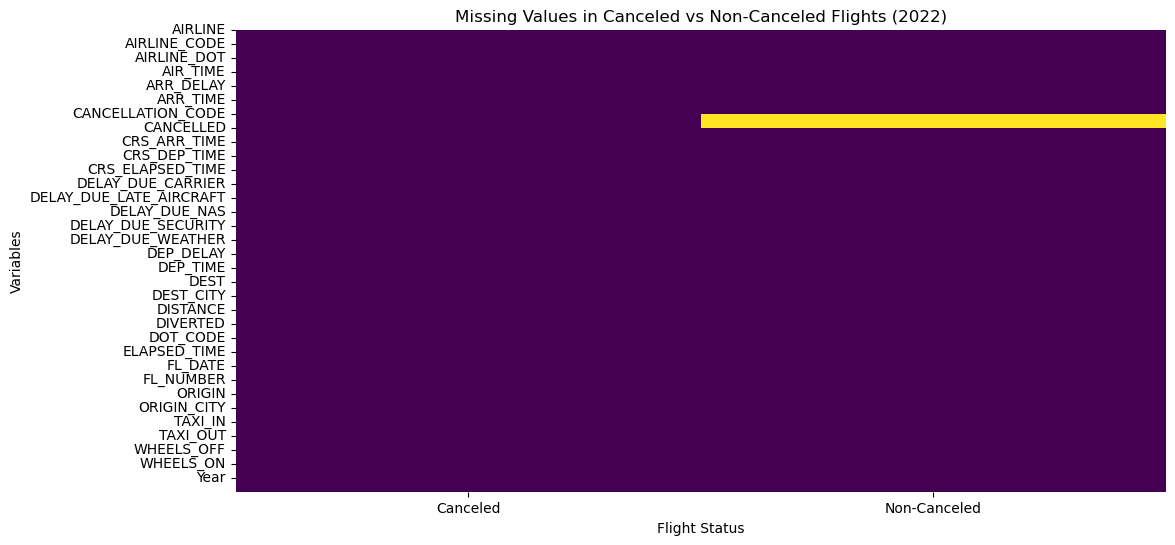

In [43]:
# Get missing values for canceled flights (2022)
canceled_flights_missing = canceled_flights_2022.isnull().sum()

# Get missing values for non-canceled flights (2022)
non_canceled_flights_missing = non_cancelled_flights_2022.isnull().sum()

# Combine both counts into a single DataFrame
missing_values_comparison = pd.DataFrame({
    'Canceled': canceled_flights_missing,
    'Non-Canceled': non_canceled_flights_missing
})

# Display the missing values count
print("Missing values count for Canceled and Non-Canceled flights:")
print(missing_values_comparison)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values_comparison.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Canceled vs Non-Canceled Flights (2022)')
plt.xlabel('Flight Status')
plt.ylabel('Variables')
plt.xticks(ticks=[0.5, 1.5], labels=['Canceled', 'Non-Canceled'], rotation=0)
plt.yticks(ticks=range(len(missing_values_comparison.index)), labels=missing_values_comparison.index, rotation=0)
plt.show()
